In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Load Task Image

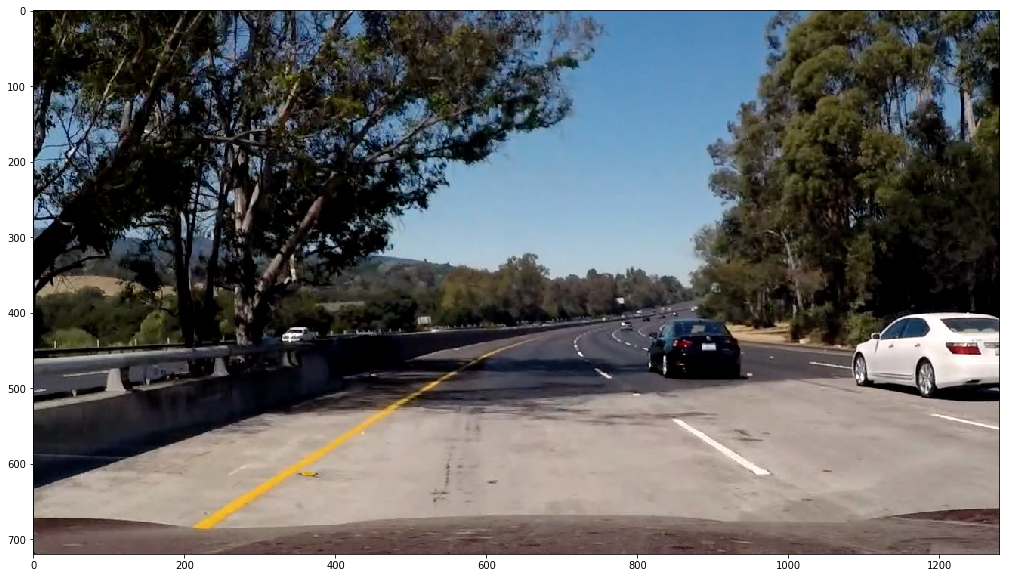

In [38]:
task_image = mpimg.imread('./test5.jpg')
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(task_image)

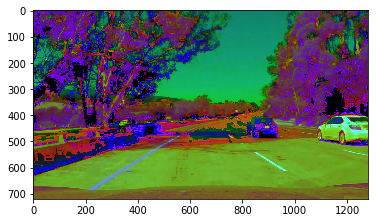

In [9]:
hsv = cv2.cvtColor(task_image, cv2.COLOR_BGR2HLS)
plt.imshow(hsv, cmap='gray')

## HLS Model

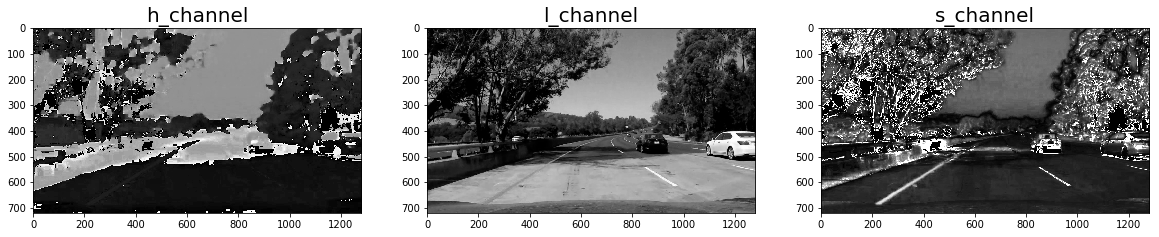

In [41]:
#TODO: Convert to HLS

hlsImage = cv2.cvtColor(task_image, cv2.COLOR_RGB2HLS)
h_channel, l_channel, s_channel = cv2.split(hlsImage)

# visualize
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('h_channel', fontsize=20)
ax1.imshow(h_channel,cmap='gray')
ax2.set_title('l_channel', fontsize=20)
ax2.imshow(l_channel,cmap='gray')
ax3.set_title('s_channel', fontsize=20)
ax3.imshow(s_channel,cmap='gray')



## HSV Model

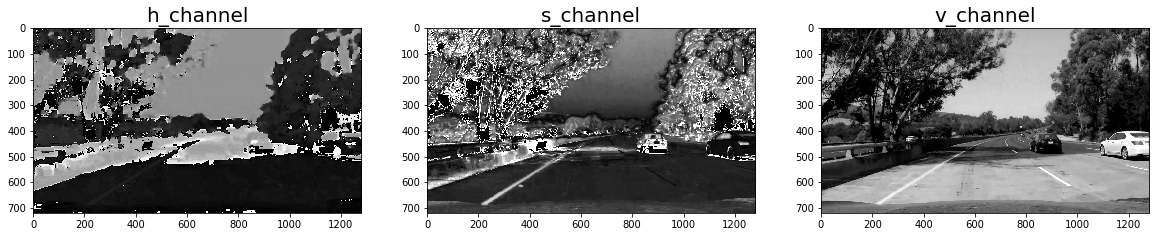

In [42]:
#TODO: Convert to HSV
hsvImage = cv2.cvtColor(task_image, cv2.COLOR_RGB2HSV)
h_channel, s_channel, v_channel = cv2.split(hsvImage)
# visualize
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('h_channel', fontsize=20)
ax1.imshow(h_channel,cmap='gray')
ax2.set_title('s_channel', fontsize=20)
ax2.imshow(s_channel,cmap='gray')
ax3.set_title('v_channel', fontsize=20)
ax3.imshow(v_channel,cmap='gray')

## LAB Model

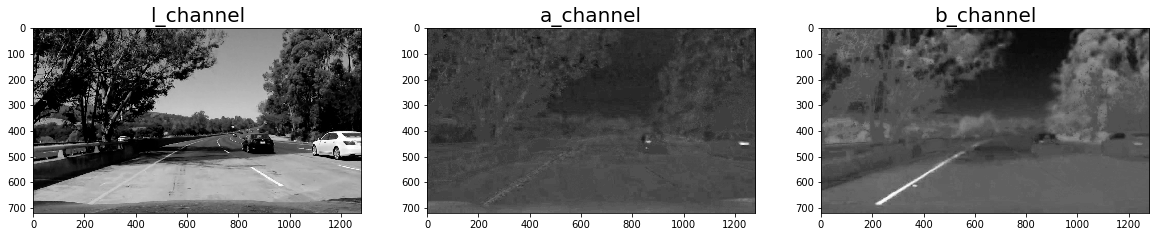

In [43]:
#TODO: Convert to LAB
labImage = cv2.cvtColor(task_image, cv2.COLOR_RGB2LAB)
l_channel, a_channel, b_channel = cv2.split(labImage)
# visualize
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('l_channel', fontsize=20)
ax1.imshow(l_channel,cmap='gray')
ax2.set_title('a_channel', fontsize=20)
ax2.imshow(a_channel,cmap='gray')
ax3.set_title('b_channel', fontsize=20)
ax3.imshow(b_channel,cmap='gray')

## RGB Model

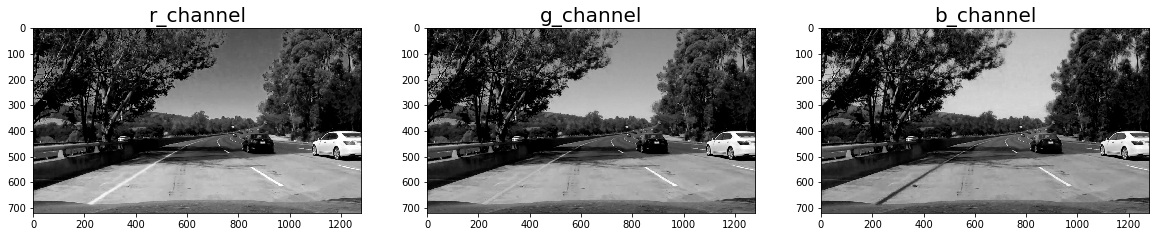

In [44]:
r_channel, g_channel, b_channel = cv2.split(task_image)


#Visualize
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('r_channel', fontsize=20)
ax1.imshow(r_channel,cmap='gray')
ax2.set_title('g_channel', fontsize=20)
ax2.imshow(g_channel,cmap='gray')
ax3.set_title('b_channel', fontsize=20)
ax3.imshow(b_channel,cmap='gray')

## Color Threshold for The White Line

In [93]:
def white(img, white_thresh = (220,255)):
   
    hlsImage = cv2.cvtColor(task_image, cv2.COLOR_RGB2HLS)
    h_channel, l_channel, s_channel = cv2.split(hlsImage)
    tmp = cv2.addWeighted(l_channel ,0.5,s_channel,0.5,0)
    ret,thresh1 = cv2.threshold(tmp,220,255,cv2.THRESH_BINARY)
    #TODO: masking
    #binary = np.zeros_like(thresh1)
     
    return thresh1

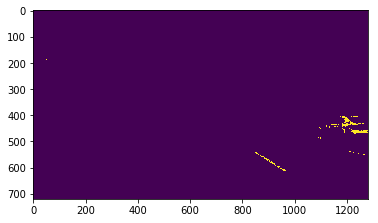

In [94]:
plt.imshow(white(task_image, white_thresh = (220,255)))

## Color Threshold for The Yellow Line

In [95]:
def yellow(img, yellow_thresh = (220,255)):
    
    r_channel, g_channel, b_channel = cv2.split(task_image)
    hsvImage = cv2.cvtColor(task_image, cv2.COLOR_RGB2HSV)
    h_channel, s_channel, v_channel = cv2.split(hsvImage)
    tmp = cv2.addWeighted(r_channel ,0.7,s_channel,0.3,0)
    ret,thresh1 = cv2.threshold(tmp,220,255,cv2.THRESH_BINARY)
     
    return thresh1

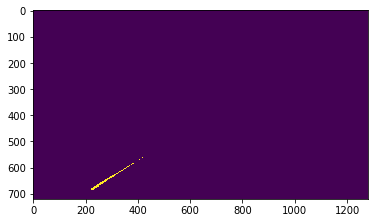

In [96]:
#print(yellow(r_channel, yellow_thresh = (220,255)))

plt.imshow(yellow(r_channel, yellow_thresh = (220,255)))

## Combined Threshold

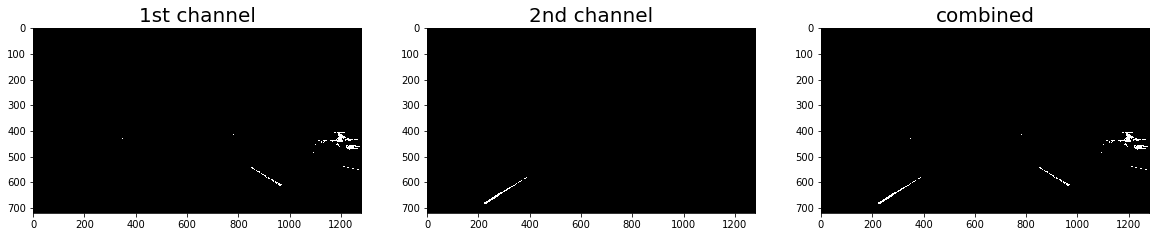

In [97]:
binary_white = white(task_image, white_thresh = (220,255))
binary_yellow = yellow(task_image, yellow_thresh = (220,255))

#TODO: combine both the white and yellow binaries in combined_binary
binary_combined = cv2.addWeighted(binary_white ,0.5,binary_yellow,0.5,0)
#binary_combined = np.zeros_like(binary_yellow)


# visualize
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('1st channel', fontsize=20)
ax1.imshow(binary_white,cmap='gray')
ax2.set_title('2nd channel', fontsize=20)
ax2.imshow(binary_yellow,cmap='gray')
ax3.set_title('combined', fontsize=20)
ax3.imshow(binary_combined,cmap='gray')